In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
warnings.filterwarnings(action= 'ignore')

# 한글 폰트
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 1. EDA
## (1) 데이터 저장

In [60]:
# 해당 directory에  'data'폴더 만들기.
# 'data' 폴더에 train.csv, test.csv, sample_submission.csv 집어넣기

In [61]:
data = []
for i in os.listdir('./data'):
    x = pd.read_csv('./data/{}'.format(i),sep = ',')
    data.append(x)
temp = data[2]
data[2] = data[0]
data[0] = temp
del temp

In [62]:
train = data[0]
test = data[1]
submission = data[2]

In [63]:
train.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0


In [64]:
train.tail(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0
1204,2021-01-26,화,2983,69,183,551,362.0,모닝롤/야채샌드 우유/주스 계란후라이/찐계란 참치죽/흑미밥 홍합탕 애호박새우젓볶음 ...,쌀밥/귀리밥/찰현미밥 들깨미역국 교촌간장치킨 옥수수콘치즈구이 가지고추장무침 포기김치...,(New)할라피뇨멸치주먹밥 잔치국수 수제고기육전 쑥갓나물 양파초절임 깍두기,1015.0,480.0


In [65]:
test.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치


In [66]:
test.tail(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
47,2021-04-07,수,2973,96,214,1,334.0,모닝롤/호떡맥모닝 우유/주스 계란후라이 팥죽/흑미밥 닭살해장국 우엉채조림 양상추샐러...,쌀밥/흑미밥/찰현미밥 냉이국 돈육간장불고기 비빔냉면 오이나물볶음 겉절이김치 양상추샐...,단호박카레라이스 시금치된장국 소떡소떡 파프리카해초무침 감귤쥬스 포기김치
48,2021-04-08,목,2973,105,238,509,324.0,모닝롤/크로크무슈 우유/주스 계란후라이 누룽지탕/흑미밥 감자국 두부양념조림 양상추샐...,쌀밥/옥수수밥/찰현미밥 맑은떡국 (New)로제찜닭 가자미구이*장 유채나물무침 포기김...,흑미밥 어묵매운탕 쇠고기숙주볶음 채소계란찜 쑥갓생무침 김치볶음
49,2021-04-09,금,2973,259,268,0,229.0,모닝롤/토마토샌드 우유/주스 계란후라이 채소죽/흑미밥 대구지리 애호박나물볶음 양상추...,쌀밥/흑미밥/찰현미밥 사골우거지국 해물누룽지탕 청포묵*양념간장 비름나물고추장무침 석...,흑미밥 맑은버섯국 매운사태조림 춘권*타르타르D 열무나물무침 포기김치


In [67]:
submission.head(3)

,일자,중식계,석식계
0,2021-01-27,0,0
1,2021-01-28,0,0
2,2021-01-29,0,0


- ### <font color = 'red'> train 데이터에 2021년 데이터는 극히 일부만 있다. <font>

## (2) 결측치 확인

In [68]:
train.isna().sum()

일자                0
요일                0
본사정원수             0
본사휴가자수            0
본사출장자수            0
본사시간외근무명령서승인건수    0
현본사소속재택근무자수       0
조식메뉴              0
중식메뉴              0
석식메뉴              0
중식계               0
석식계               0
dtype: int64

In [69]:
test.isna().sum()

일자                0
요일                0
본사정원수             0
본사휴가자수            0
본사출장자수            0
본사시간외근무명령서승인건수    0
현본사소속재택근무자수       0
조식메뉴              0
중식메뉴              0
석식메뉴              0
dtype: int64

- ### <font color = 'red'> train, test 모두 결측치가 존재하지 않는다. <font>

## (3) 중복값 확인

In [70]:
train.duplicated().value_counts()

False    1205
dtype: int64

In [71]:
test.duplicated().value_counts()

False    50
dtype: int64

- ### <font color = 'red'> train, test 모두 중복값이 존재하지 않는다. <font>

## (4) 이상치 확인

### (a) boxplot 그려보기

<AxesSubplot:>

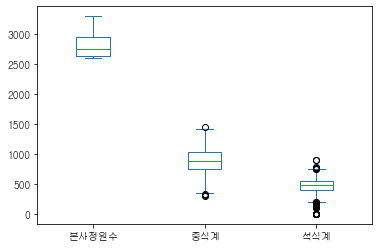

In [72]:
train[['본사정원수','중식계','석식계']].plot(kind = 'box')

### (b) 이상치가 발견된 중식계, 석식계의 최솟값, 최댓값 데이터 살펴보기

In [73]:
# 중식계의 최댓값 row 뽑아보기
train.loc[train['중식계'] == max(train['중식계'].tolist())]

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
735,2019-02-11,월,2806,67,159,758,0.0,모닝롤/초코핫케익 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 콩나물국 두...,쌀밥/잡곡밥 (쌀:국내산) 어묵국 소불고기 (소고기:호주산) 계란말이 실곤약초무...,쌀밥/잡곡밥 (쌀:국내산) 된장찌개 닭볶음탕 (닭:국내산) 부추호박전 오이사과생...,1459.0,772.0


In [74]:
# 중식계의 최솟값 row 뽑아보기
train.loc[train['중식계'] == min(train['중식계'].tolist())]

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
705,2018-12-24,월,2846,894,159,26,0.0,모닝롤/프렌치토스트 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 콩나물김치국...,쌀밥/잡곡밥 (쌀:국내산) 열무된장국 훈제오리구이 매운어묵볶음 쌈무/부추생채 ...,쌀밥/잡곡밥 (쌀:국내산) 민물새우찌개 닭갈비 버섯잡채 오이무침 포기김치 (...,296.0,104.0


- #### <font color = 'red'> 중식 : 이상치 값들이지만 다른 feature에서 확연히 다른 값을 가지기 때문에 구분이 가능하다 <font>

In [75]:
# 석식계의 최댓값 row 뽑아보기
train.loc[train['석식계'] == max(train['석식계'].tolist())]

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
164,2016-10-05,수,2670,41,228,0,0.0,모닝롤/참치샌드 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 어묵국 감자...,쌀밥/잡곡밥 (쌀:국내산) 차돌박이찌개 (쇠고기:호주산) 매운주꾸미볶음 모둠소세지...,"쌀밥/잡곡밥 (쌀:국내산) 순두부찌개 미니함박조림 (쇠고기:호주산,돈육:국내산) ...",1336.0,905.0


In [76]:
# 석식계의 최솟값 row 뽑아보기
x = train.loc[train['석식계'] == min(train['석식계'].tolist())]
print("\n\n석식계가 0인 날의 개수 : {}".format(len(x)))
x[:10]



석식계가 0인 날의 개수 : 43


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
204,2016-11-30,수,2689,68,207,0,0.0,모닝롤/카스텔라 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 고추장찌개 ...,나물비빔밥 (쌀:국내산) 가쯔오장국 치킨핑거*요거트D 감자샐러드 오복지무침 ...,*,1109.0,0.0
224,2016-12-28,수,2705,166,225,0,0.0,모닝롤/고구마파이 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 북어계란국 ...,콩나물밥 (쌀:국내산) 가쯔오장국 미트볼케찹조림 꽃맛살샐러드 군고구마 배추겉...,*,767.0,0.0
244,2017-01-25,수,2697,79,203,0,0.0,모닝롤/토마토샌드 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 ...,카레덮밥 (쌀:국내산) 맑은국 유린기 개성감자만두 오이사과무침 포기김치 (김...,*,720.0,0.0
262,2017-02-22,수,2632,75,252,0,0.0,모닝롤/브라우니 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 꽃게탕 명엽채...,나물비빔밥 (쌀:국내산) 유부장국 생선까스*탈탈소스 파스타샐러드 마늘쫑볶음 ...,*,1065.0,0.0
281,2017-03-22,수,2627,53,235,0,0.0,모닝롤/찐빵 우유/주스 계란후라이 김치죽/쌀밥 (쌀:국내산) 콩나물국 김실파무침...,쌀밥/잡곡밥 (쌀:국내산) 돈육김치찌개 유린기 비엔나볶음 세발나물 깍두기 (...,*,953.0,0.0
306,2017-04-26,수,2626,45,304,0,0.0,모닝롤/와플 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 된장찌개 검정콩조...,비빔밥 (쌀:국내산) 맑은국 오징어튀김 견과류조림 하와이안샐러드 깍두기 (김...,*,835.0,0.0
327,2017-05-31,수,2637,43,265,0,0.0,모닝롤/베이글 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 자...,열무보리비빔밥 (쌀:국내산) 가쯔오장국 탕수만두 콥샐러드 오이지무침 포기김치...,자기계발의날,910.0,0.0
346,2017-06-28,수,2648,58,259,0,0.0,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 쇠고기매운국 고...,콩나물밥 (쌀:국내산) 얼갈이된장국 삼치구이 잡채 아삭고추무침 깍두기 (김치...,*자기계발의날*,745.0,0.0
366,2017-07-26,수,2839,254,246,0,0.0,모닝롤/단팥빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 민물새우찌개 숙...,나물비빔밥 미소장국 파스타샐러드 소세지오븐구이 오렌지 포기김치 (김치:국내산),가정의날,797.0,0.0
392,2017-09-01,금,2642,177,303,45,0.0,모닝롤/단팥빵 우유/주스 계란후라이 단호박죽/쌀밥 (쌀:국내산) 대구찌개 깻순나...,쌀밥/잡곡밥 (쌀:국내산) 시래기국 훈제오리구이 두부구이*양념장 쌈무/양파절임...,*,663.0,0.0


- #### <font color = 'red'> 석식 : 석식이 아예 제공되지 않는 날이 존재한다. <font>
- #### <font color = 'red'> 전처리 방식 많이 달라짐 <font>

## (5) 상관계수 확인 후 heatmap 그리기

### (a) 일자 feature를 년,월,일로 나눠주기

In [77]:
# 훈련용 데이터
train['일자'] = train['일자'].astype(np.datetime64)

train['년'] = train['일자'].dt.year
train['월'] = train['일자'].dt.month
train['일'] = train['일자'].dt.day

# 테스트 데이터
test['일자'] = test['일자'].astype(np.datetime64)

test['년'] = test['일자'].dt.year
test['월'] = test['일자'].dt.month
test['일'] = test['일자'].dt.day

# column 정렬
train = train[train.columns.tolist()[-3:] + train.columns.tolist()[:-3]]
test = test[test.columns.tolist()[-3:] + test.columns.tolist()[:-3]]

In [78]:
train.head(3)

,년,월,일,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016,2,1,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016,2,2,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016,2,3,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0


In [79]:
test.head(3)

,년,월,일,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021,1,27,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021,1,28,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021,1,29,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치


In [80]:
stay = ['12-31','01-02','2016-02-06', '2016-02-11', '2017-01-26', '2017-01-31','2018-02-14', '2018-02-18', '2019-02-03',
        '2019-02-07', '2020-01-23', '2020-01-28', '2021-02-10', '2021-02-15', '02-28','02-29','03-02', '2016-04-12',
        '2016-04-14' '04-30','2020-04-14', '2020-04-16', '05-02', '05-04', '05-06', '2018-05-08', '2019-05-07', 
        '2016-05-13', '2016-05-15', '2017-05-02', '2017-05-04', '2017-05-08', '2017-05-10' '2018-05-21', '2018-05-23', 
        '2019-05-11', '2019-05-13', '2020-04-29', '2020-04-29', '2020-05-01','2021-05-18', '2021-05-20','06-05','06-07',
        '08-14', '08-16', '2016-09-13', '2016-09-17', '2017-10-02', '2017-10-07', '2018-06-12', '2018-06-14','2018-09-22',
        '2018-09-27', '2019-09-11', '2019-09-15', '2020-09-29', '2020-10-03', '2021-09-19', '2021-09-23', '10-02', 
        '10-04', '10-08', '10-10', '12-24','12-26', '2020-08-18']

### (b) 데이터를 활용해 식사가능 인원 column 만들기

In [81]:
train["식사가능인원"] = (train["본사정원수"] -  train["본사휴가자수"] - train["본사출장자수"] - train["현본사소속재택근무자수"])
train = train[train.columns.tolist()[:-3]+ train.columns.tolist()[-1:] + train.columns.tolist()[-3:-1]]

test["식사가능인원"] = (test["본사정원수"] -  test["본사휴가자수"] - test["본사출장자수"] - test["현본사소속재택근무자수"])

In [82]:
train

,년,월,일,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,식사가능인원,중식계,석식계
0,2016,2,1,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",2401.0,1039.0,331.0
1,2016,2,2,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",2378.0,867.0,560.0
2,2016,2,3,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",2365.0,1017.0,573.0
3,2016,2,4,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",2277.0,978.0,525.0
4,2016,2,5,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",2142.0,925.0,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021,1,20,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,2319.0,1093.0,421.0
1201,2021,1,21,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,2309.0,832.0,353.0
1202,2021,1,22,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,2177.0,579.0,217.0
1203,2021,1,25,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,2396.0,1145.0,502.0


In [83]:
test

,년,월,일,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,식사가능인원
0,2021,1,27,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치,2355.0
1,2021,1,28,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지,2319.0
2,2021,1,29,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치,2170.0
3,2021,2,1,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치,2340.0
4,2021,2,2,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치,2362.0
5,2021,2,3,2021-02-03,수,2924,59,199,5,286.0,모닝롤/게살모닝샌드 우유/주스 계란후라이/찐계란 소고기죽/흑미밥 시래기된장국 베이컨...,쌀밥/흑미밥/찰현미밥 아욱국 매콤해물볶음 감자조림 미나리나물 포기김치 콥샐러드*렌치D,오므라이스 가쓰오장국 빌소세지구이*구운채소 단감치커리무침 양념고추지 겉절이김치,2380.0
6,2021,2,4,2021-02-04,목,2924,61,211,476,288.0,모닝롤/사과파이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 아욱국 새송이버섯곤약장...,쌀밥/차조밥/찰현미밥 설렁탕 고등어김치말이찜 볼어묵굴소스볶음 브로콜리숙회*초장 석박...,흑미밥 계란파국 돈육두루치기 감자채파프리카볶음 세발나물오리엔탈무침 포기김치,2364.0
7,2021,2,5,2021-02-05,금,2924,169,252,0,256.0,모닝롤/앙버터모닝빵 우유/주스 계란후라이/찐계란 고구마죽/흑미밥 옹심이국 머위나물무...,쌀밥/흑미밥/찰현미밥 북엇국 닭볶음탕 채소전*장 솎음열무나물무침 포기김치 양상추샐러...,유부초밥/추가밥 온메밀소바 국물떡볶이 순대찜*소금 청경채겉절이 포기김치,2247.0
8,2021,2,8,2021-02-08,월,2924,88,174,690,329.0,모닝롤/스콘 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 꽃게탕 근대나물무침 연두부...,쌀밥/흑미밥/찰현미밥 감자양파국 돈수육*씨앗쌈장 매콤어묵볶음 콩나물파채무침 포기김치...,흑미밥 냉이국 반반치킨 꼬막채소무침 청경채찜 포기김치,2333.0
9,2021,2,9,2021-02-09,화,2924,94,183,542,329.0,모닝롤/치즈팡샌드 우유/주스 계란후라이/찐계란 팥죽/흑미밥 맑은버섯국 시금치나물무침...,쌀밥/기장밥/찰현미밥 장각백숙 적어양념장구이 채소스틱*쌈장 도라지오이초무침 겉절이김...,흑미밥 미역국 매운소불고기 단호박두부탕수 메추리알장조림 석박지,2318.0


### (c) 연속형 변수 상관계수 확인하기

In [84]:
train[['일','식사가능인원','본사정원수','본사휴가자수','본사출장자수','본사시간외근무명령서승인건수','현본사소속재택근무자수','중식계','석식계']].corr()

,일,식사가능인원,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
일,1.000000,-0.028433,-0.020737,-0.009210,0.144007,-0.093606,-0.031583,-0.097392,-0.185565
식사가능인원,-0.028433,1.000000,0.503771,-0.552661,0.136389,0.309118,-0.150393,0.286810,0.172373
본사정원수,-0.020737,0.503771,1.000000,0.244666,-0.061688,0.146544,0.452293,-0.115529,-0.173852
본사휴가자수,-0.009210,-0.552661,0.244666,1.000000,-0.273318,-0.230789,0.065397,-0.391975,-0.316894
본사출장자수,0.144007,0.136389,-0.061688,-0.273318,1.000000,-0.308757,-0.352643,-0.512680,-0.188164
본사시간외근무명령서승인건수,-0.093606,0.309118,0.146544,-0.230789,-0.308757,1.000000,0.156792,0.535611,0.571168
현본사소속재택근무자수,-0.031583,-0.150393,0.452293,0.065397,-0.352643,0.156792,1.000000,0.076509,-0.057534
중식계,-0.097392,0.286810,-0.115529,-0.391975,-0.512680,0.535611,0.076509,1.000000,0.508287
석식계,-0.185565,0.172373,-0.173852,-0.316894,-0.188164,0.571168,-0.057534,0.508287,1.000000


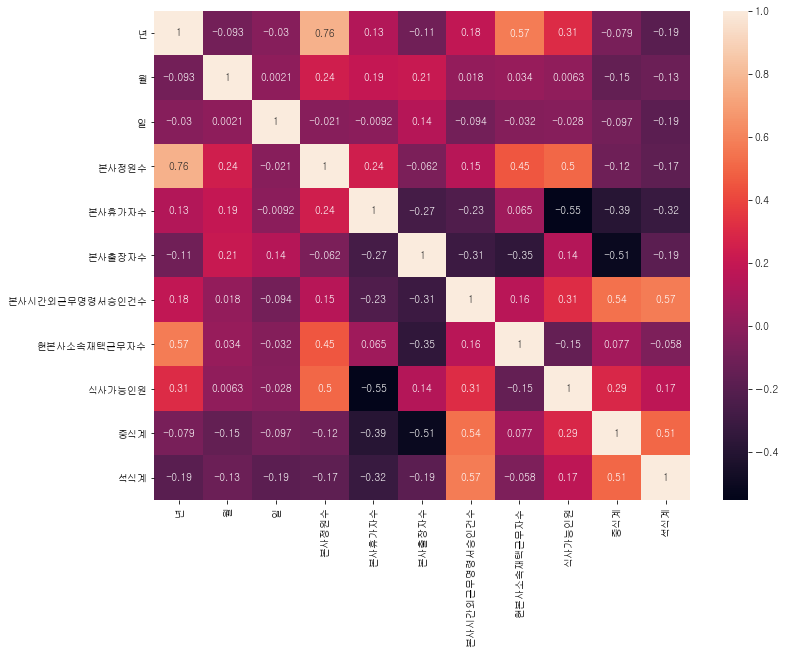

In [85]:
plt.figure(figsize=(12, 9))
sns.heatmap(train.corr(), annot=True)
plt.show()

- #### <font color = 'red'> '본사 시간 외 근무명령서 승인건수', '본사 휴가자 수' 가 가장 뚜렷한 상관성을 보인다. <font>
- #### <font color = 'red'> 식사가능인원은 결국 다른 feature들을 이용해 계산한 것인데, 중복해서 사용할 수 있는가? <font>

## (6) 요일 feature

### (a) 요일별 식사가능 인원

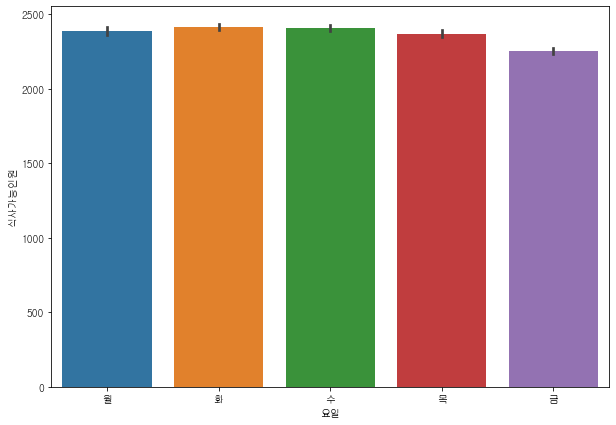

In [86]:
plt.figure(figsize=(10, 7))
g_day_of_week1 = sns.barplot( x = train['요일'], y = train['식사가능인원'])
plt.show(g_day_of_week1)

- #### <font color = 'red'> 시간외근무자 수는 수요일, 금요일에 현저히 적다(회사의 정책?) <font>
- #### <font color = 'red'> 휴가 인원은 월, 금요일에 많다<font>
- #### <font color = 'red'> 출장자 수는 월요일에 가장 적고, 금요일에 가장 많다.(유의미한가?)<font>

### (b) 요일 feature과 다른 feature 들과의 관계

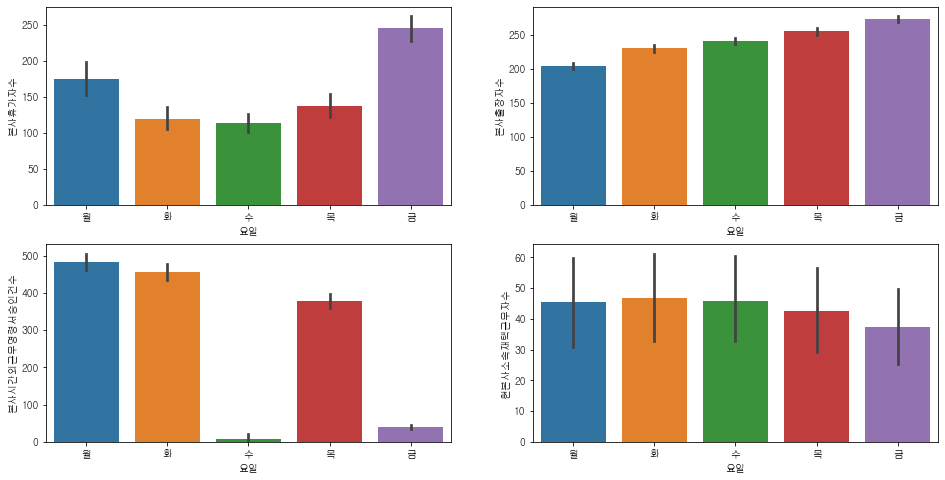

In [87]:
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(16,8)

g_day_of_week2 = sns.barplot(x=train['요일'], y=train["본사휴가자수"], ax=ax[0][0])
g_day_of_week3 = sns.barplot(x=train['요일'], y=train['본사출장자수'], ax=ax[0][1])
g_day_of_week4 = sns.barplot(x=train['요일'], y=train["본사시간외근무명령서승인건수"], ax=ax[1][0])
g_day_of_week5 = sns.barplot(x=train['요일'], y=train['현본사소속재택근무자수'], ax=ax[1][1])

plt.show()

### (c) 휴가자 수가 480명이 넘는 요일들의 합계

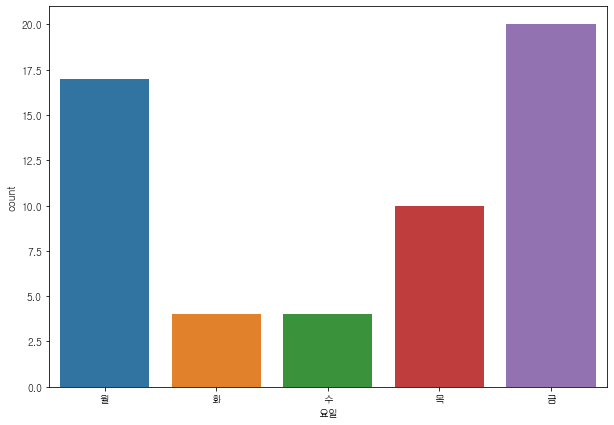

In [88]:
plt.figure(figsize=(10, 7))
gg = sns.countplot( x = train[train["본사휴가자수"]>480]["요일"], order = ['월', '화', '수', '목', '금'])
plt.show(gg)

- #### <font color = 'red'> 휴가자가 많은 요일 중 월, 금의 비중이 높다 <font>
- #### <font color = 'red'> 우리나라 특성상 여름에 휴가자가 많다. <font>
- #### <font color = 'red'> 휴일 전후로 휴가자가 많은 것 같다.<font>

### (d) 요일별 식사 가능 인원

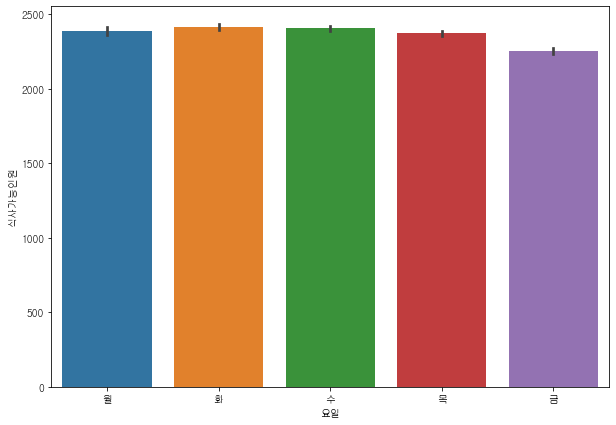

월요일 식사가능인원: 2387.597510373444 

화요일 식사가능인원: 2411.3333333333335 

수요일 식사가능인원: 2405.539748953975 

목요일 식사가능인원: 2370.4754098360654 

금요일 식사가능인원: 2251.780082987552 



In [89]:
plt.figure(figsize=(10, 7))
g_day_of_week10 = sns.barplot( x = train['요일'], y = train['식사가능인원'])
plt.show(g_day_of_week10)
for x in ["월", "화", "수", "목", "금"]:
    print(f"{x}요일 식사가능인원:", train[train["요일"] == x]["식사가능인원"].mean(), '\n')

### (e) 요일별 중식계 석식계

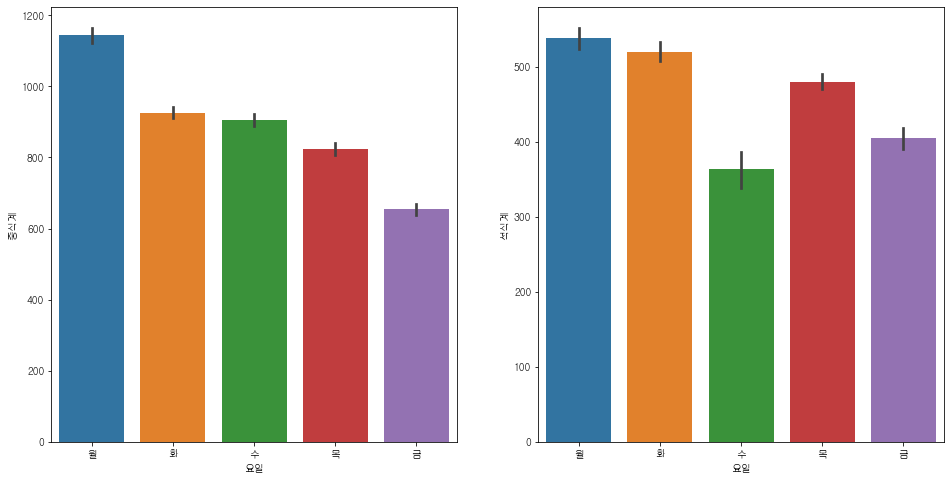

,중식계,석식계
요일,,
금,653.609959,404.979253
목,823.991803,480.401639
수,905.213389,363.615063
월,1144.331950,538.933610
화,925.620833,520.129167


In [90]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(16,8)

g_day_of_week6 = sns.barplot( x = train['요일'], y = train['중식계'], ax=ax[0])
g_day_of_week7 = sns.barplot( x = train['요일'], y = train['석식계'], ax=ax[1])

plt.show()
train[['요일','중식계','석식계']].groupby(['요일']).mean()

- #### <font color = 'red'> [중식] 월요일에 많이 먹는다. <font>
- #### <font color = 'red'> [석식] 수요일은 석식 운영이 없는 날의 영향, 금요일은 요일의 영향이 강한 것으로 보인다.<font>

### (f) 석식 운영이 없는 수요일(temp_df)을 제외한 비교 그래프

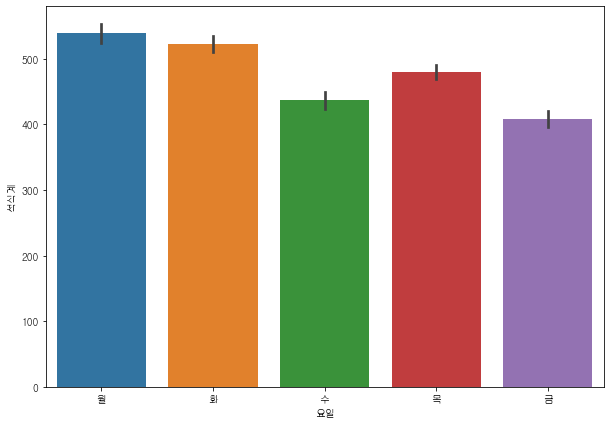

In [91]:
temp_df = train[train["석식계"]>0]
plt.figure(figsize=(10, 7))
g_day_of_week77 = sns.barplot( x = temp_df['요일'], y = temp_df['석식계'])
plt.show(g_day_of_week77)

- #### <font color = 'red'>제외해도 유의미하게 수요일이 적다(시간 외 근무가 적어서?)<font>

## (7) 인원 feature

### (a) 본사 정원수, 식사가능인원

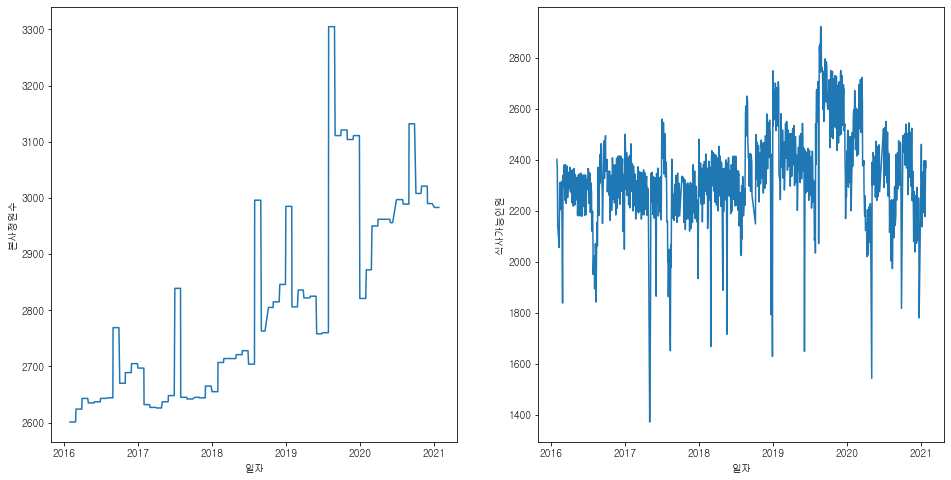

In [92]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(16,8)

g_date1 = sns.lineplot( x = train['일자'], y = train['본사정원수'], ax = ax[0])
g_date11 = sns.lineplot( x = train['일자'], y = train['식사가능인원'], ax = ax[1] )

plt.show()

- #### <font color = 'red'>본사 정원은, 늘었다 줄었다를 반복하며 상승추세 / 코로나로 인해 최근 식사가능 인원 줄어듦<font>

### (b) 본사휴가자수, 본사출장자수, 시간외근무, 재택근무

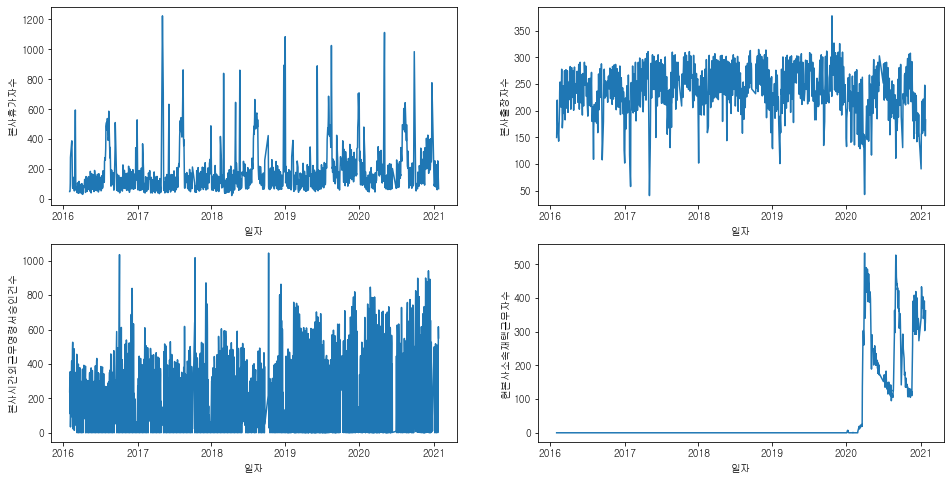

In [93]:
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(16,8)

g_date2 = sns.lineplot(x=train['일자'], y=train["본사휴가자수"], ax=ax[0][0])
g_date3 = sns.lineplot(x=train['일자'], y=train['본사출장자수'], ax=ax[0][1])
g_date4 = sns.lineplot(x=train['일자'], y=train["본사시간외근무명령서승인건수"], ax=ax[1][0])
g_date5 = sns.lineplot(x=train['일자'], y=train['현본사소속재택근무자수'], ax=ax[1][1])
plt.show()

- #### <font color = 'red'>특정 시점에 휴가자, 시간외근무자가 많거나 출장자 수가 적다<font>
    - 휴일 등과 관련되지 않을까?
- #### <font color = 'red'>재택근무자 수는 코로나 발생 시점, 확진자 수 급증 시점과 맞물려 있을 것이다.<font>
    - 어케 처리할까?

### (c) 년, 월, 일에 따른 인원

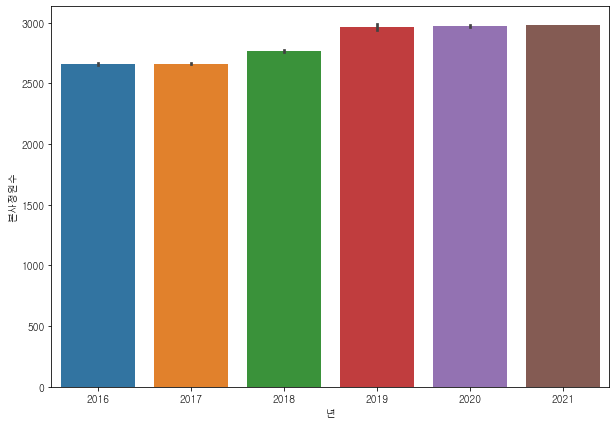

,월,일,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,식사가능인원,중식계,석식계
년,,,,,,,,,,,,,,,
2016,227,227,227,227,227,227,227,227,227,227,227,227,227,227,227
2017,244,244,244,244,244,244,244,244,244,244,244,244,244,244,244
2018,239,239,239,239,239,239,239,239,239,239,239,239,239,239,239
2019,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246
2020,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232
2021,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17


In [94]:
plt.figure(figsize=(10, 7))
g_year1 = sns.barplot( x = train['년'], y = train['본사정원수'])
plt.show(g_year1)
temp3 = train.groupby("년").count()
temp3

- #### <font color = 'red'>학습 데이터에서 2021은 유의해서 다뤄야 함<font>

### (c) 월 데이터와 다른 feature 비교

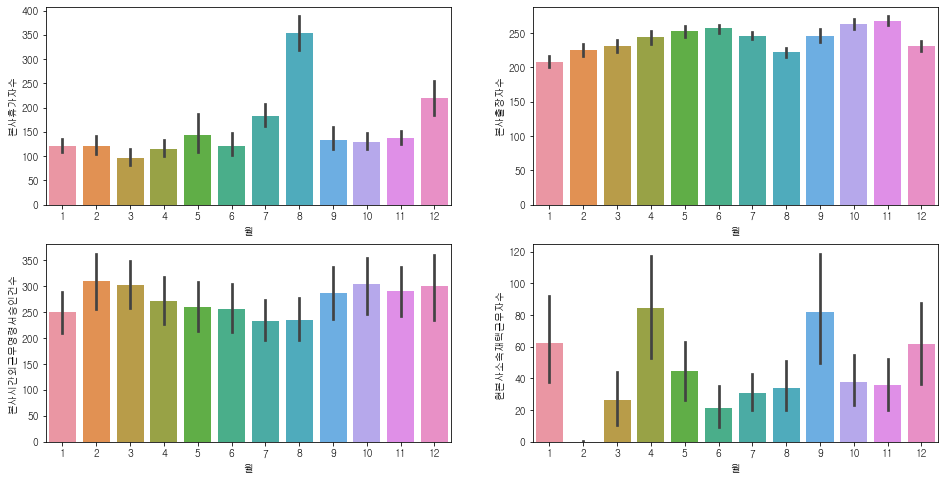

In [95]:
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(16,8)

g_month1 = sns.barplot(x=train['월'], y=train["본사휴가자수"], ax=ax[0][0])
g_month2 = sns.barplot(x=train['월'], y=train['본사출장자수'], ax=ax[0][1])
g_month3 = sns.barplot(x=train['월'], y=train["본사시간외근무명령서승인건수"], ax=ax[1][0])
g_month4 = sns.barplot(x=train['월'], y=train['현본사소속재택근무자수'], ax=ax[1][1])

plt.show()

- #### <font color = 'red'>재택근무자 수의 경우 국가 정책과 유의미한 상관이 있을 것<font>

### (d) 월별 식사가능 인원

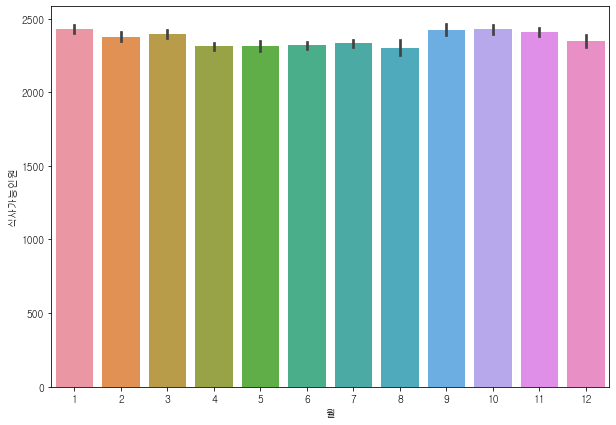

In [96]:
plt.figure(figsize=(10, 7))
g_year1 = sns.barplot(x = train['월'], y = train["식사가능인원"])
plt.show(g_year1)

- #### <font color = 'red'>8월에 휴가자가 많긴한데, 휴가자들이 원래 구내식당 이용을 잘 안하면 별 영향이 없을수도<font>
    - 주로 이용하는 사람이 누군지 생각해봐야 할 듯

### (e) 일별 식사가능 인원

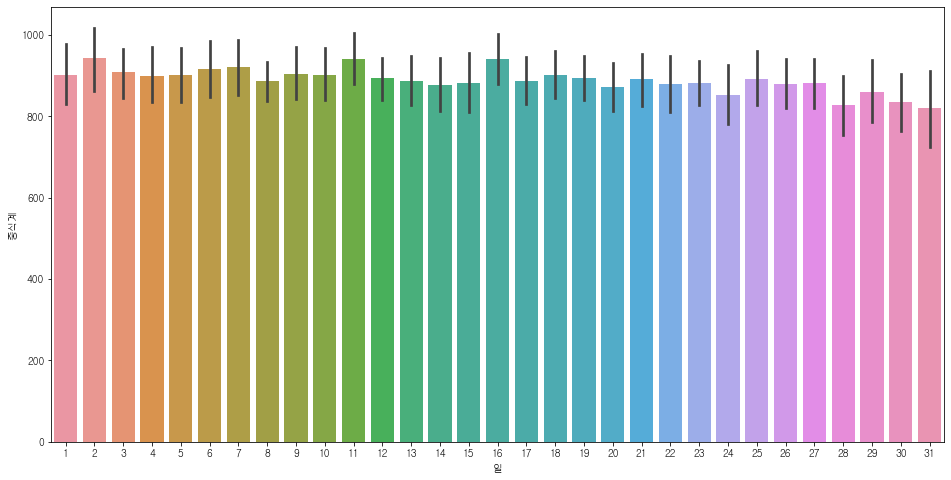

In [97]:
plt.figure(figsize=(16, 8))
g_day1 = sns.barplot( x = train['일'], y = train['중식계'])
plt.show(g_day1)

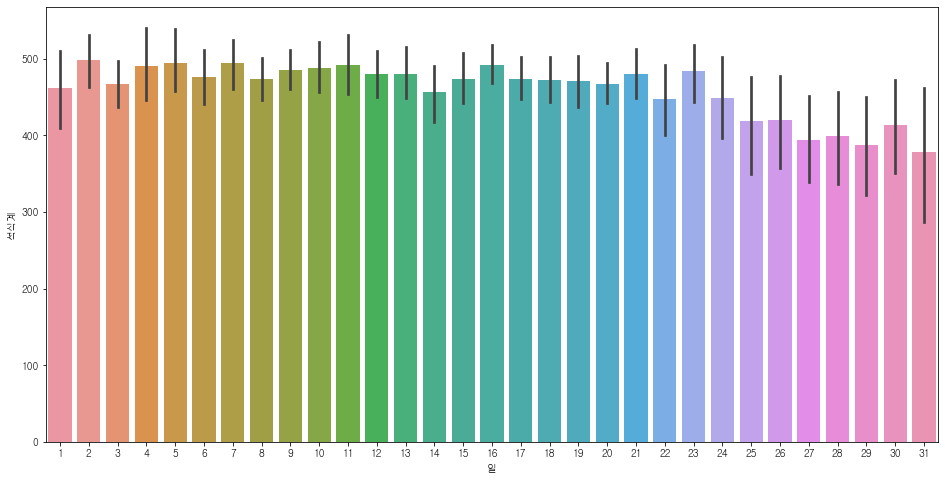

In [98]:
plt.figure(figsize=(16, 8))
g_day2 = sns.barplot( x = train['일'], y = train['석식계'])
plt.show(g_day2)

- #### <font color = 'red'>유의미 하지 않음<font>

## (8) 중식계, 석식계

### (a) 중식계

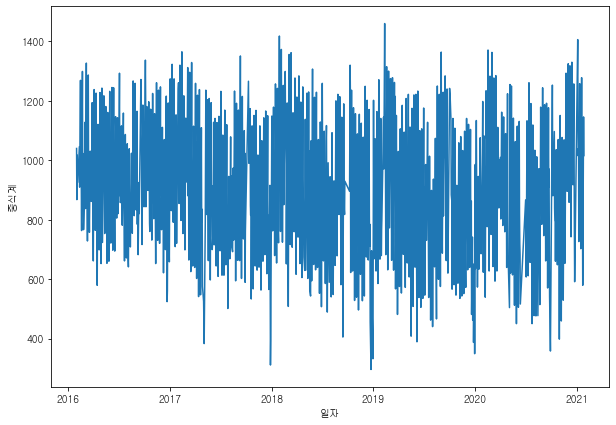

In [99]:
plt.figure(figsize=(10, 7))
g_date6 = sns.lineplot( x = train['일자'], y = train['중식계'])
plt.show(g_date6)

- #### <font color = 'red'>별 다른 추세가 보이지 않는다<font>

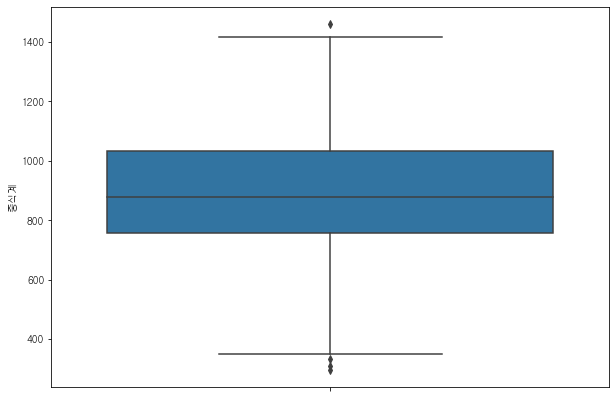

In [100]:
plt.figure(figsize=(10, 7))
g_date66 = sns.boxplot( y = train['중식계'])
g_date66.set(xticklabels=[])
plt.show(g_date66)

### (b) 석식

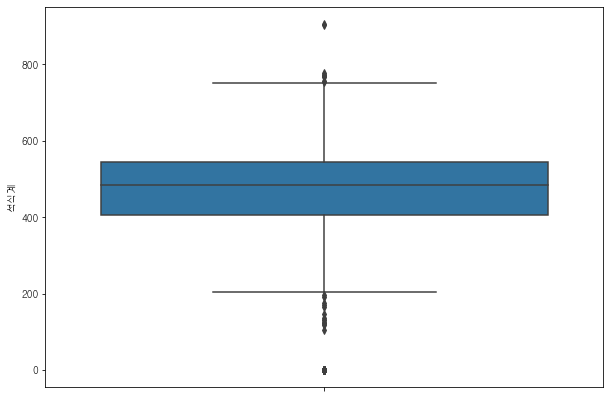

In [101]:
plt.figure(figsize=(10, 7))
g_date77 = sns.boxplot( y = train['석식계'])
plt.show(g_date77)

- #### <font color = 'red'> 대체로 중식보다 인원이 적고, 약한 하락추세를 보인다. <font>

In [102]:
train[(train["석식계"] < 250) & (train["석식계"] > 0)].head(3)

,년,월,일,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,식사가능인원,중식계,석식계
152,2016,9,13,2016-09-13,화,2769,511,108,52,0.0,모닝롤/토마토샌드 우유/주스 스크램블에그 새송이죽/쌀밥 (쌀:국내산) 감자국 멸...,쌀밥/잡곡밥 (쌀:국내산) 토란국 매운돼지갈비찜 어묵볶음 쑥갓두부무침 포기김...,쌀밥/잡곡밥 (쌀:국내산) 참치김치찌개 주꾸미볶음 모듬묵*양념장 치커리유자무침...,2150.0,820.0,238.0
220,2016,12,22,2016-12-22,목,2705,118,242,32,0.0,모닝롤/에그샌드 우유/주스 삶은계란 양송이죽/쌀밥 (쌀:국내산) 근대국 명엽채무...,쌀밥/잡곡밥 (쌀:국내산) 꽃게탕 쇠고기버섯볶음 양배추쌈*쌈장 오이무침 포기...,작은밥 (쌀:국내산) 바지락수제비 사천식탕수육 메추리알조림 귤 배추겉절이 (...,2345.0,524.0,213.0
245,2017,1,26,2017-01-26,목,2697,369,117,28,0.0,모닝롤/와플 우유/주스 스크램블에그 야채죽/쌀밥 (쌀:국내산) 오징어국 크래미숙...,쌀밥/잡곡밥 (쌀:국내산) 배추된장국 소갈비찜 삼색꼬지전 콩나물무침 포기김치...,쌀밥/잡곡밥 (쌀:국내산) 시래기들깨탕 돈육강정 메추리알곤약조림 물파래무침 ...,2211.0,844.0,147.0


- #### <font color = 'red'> 석식 인원이 250명보다 낮은 경우, 연말이나 휴일 근처의 날들이 눈에 띈다.<font>

### (c) 년도 별 중식계, 석식계

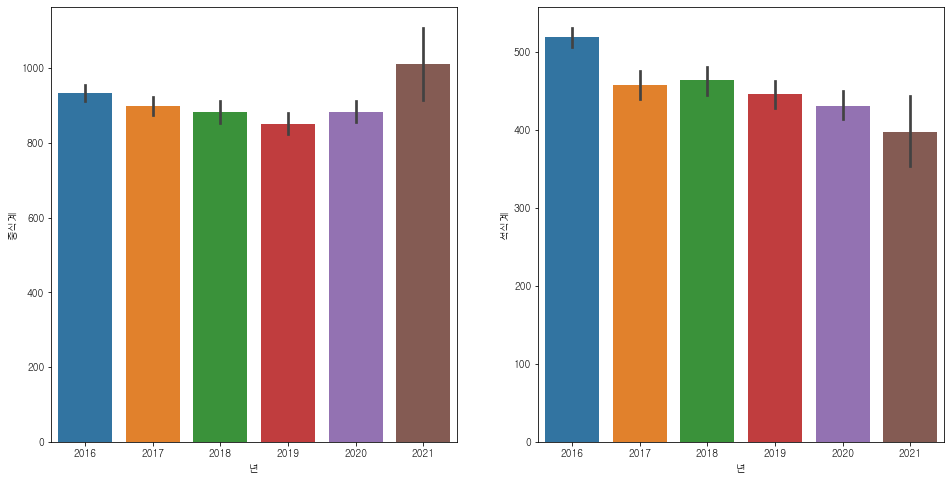

In [103]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(16,8)

g_year6 = sns.barplot(x=train['년'], y=train["중식계"], ax=ax[0])
g_year7 = sns.barplot(x=train['년'], y=train['석식계'], ax=ax[1])

plt.show()

### (d) 월별 중식계, 석식계

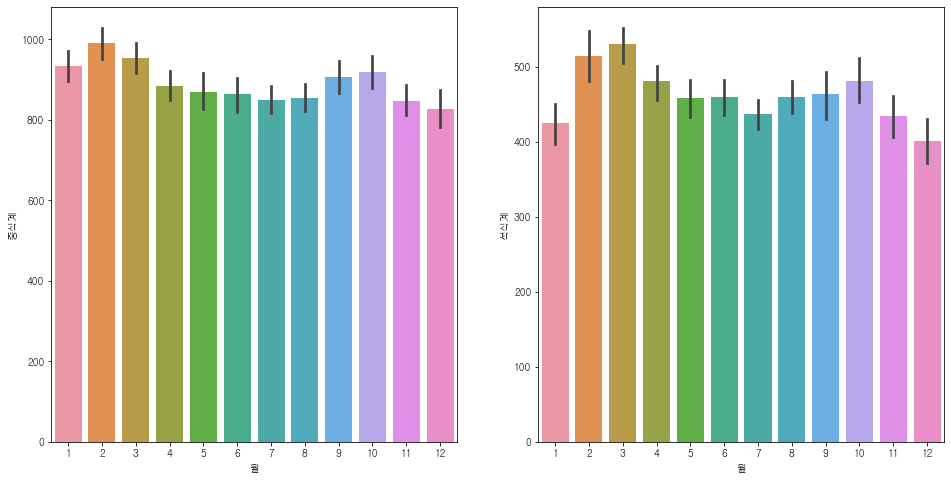

In [104]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(16,8)

g_month6 = sns.barplot(x=train['월'], y=train["중식계"], ax=ax[0])
g_month7 = sns.barplot(x=train['월'], y=train['석식계'], ax=ax[1])

plt.show()

## (9) 식사 메뉴
### (a) 조식 메뉴 간단히 보기

In [105]:
# 조식메뉴 먼저 확인하기
temp_break = []
for x in train['조식메뉴']:
    temp_break.append(x)

temp_test_break = []
for x in test['조식메뉴']:
    temp_test_break.append(x)
    
for i in range(10):
    print(temp_break[i])
    
print('---------------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------------')

for i in range(10):
    print(temp_test_break[i])

모닝롤/찐빵  우유/두유/주스 계란후라이  호두죽/쌀밥 (쌀:국내산) 된장찌개  쥐어채무침  포기김치 (배추,고추가루:국내산) 
모닝롤/단호박샌드  우유/두유/주스 계란후라이  팥죽/쌀밥 (쌀:국내산) 호박젓국찌개  시래기조림  포기김치 (배추,고추가루:국내산) 
모닝롤/베이글  우유/두유/주스 계란후라이  표고버섯죽/쌀밥 (쌀:국내산) 콩나물국  느타리호박볶음  포기김치 (배추,고추가루:국내산) 
모닝롤/토마토샌드  우유/두유/주스 계란후라이  닭죽/쌀밥 (쌀,닭:국내산) 근대국  멸치볶음  포기김치 (배추,고추가루:국내산) 
모닝롤/와플  우유/두유/주스 계란후라이  쇠고기죽/쌀밥 (쌀:국내산) 재첩국  방풍나물  포기김치 (배추,고추가루:국내산) 
팬케익/찐빵  우유/두유/주스  계란후라이  견과류죽/쌀밥 (쌀:국내산) 감자찌개  명엽채무침 포기김치 (김치:국내산) 
모닝롤/야채샌드  우유/두유/주스  계란후라이  고구마죽/쌀밥 (쌀:국내산) 봄동된장국  숙주나물 포기김치 (김치:국내산) 
모닝롤/치즈프레즐  우유/두유/주스  계란후라이  잣죽/쌀밥 (쌀:국내산) 민물새우찌개  콩조림 포기김치 (김치:국내산) 
모닝롤/마늘빵  우유/두유/주스  계란후라이  단호박죽/쌀밥 (쌀:국내산) 어묵국  김구이 포기김치 (김치:국내산) 
모닝롤/참치샌드  우유/두유/주스  계란후라이  흑임자죽/쌀밥 (쌀:국내산) 북어계란국  무생채 포기김치 (김치:국내산) 
---------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------
모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자전 양상추샐러드/사과 포기김치 
모닝롤/대만샌드위치 우

### (b) 중식 메뉴 간단히 보기

In [106]:
# 중식메뉴 먼저 확인하기
temp_lunch = []
for x in train['중식메뉴']:
    temp_lunch.append(x)

temp_test_lunch = []
for x in test['중식메뉴']:
    temp_test_lunch.append(x)
    
for i in range(10):
    print(temp_lunch[i])
    
print('---------------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------------')

for i in range(10):
    print(temp_test_lunch[i])

쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜  청포묵무침  요구르트  포기김치 (배추,고추가루:국내산) 
쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무침  요구르트  배추겉절이 (배추,고추가루:국내산) 
카레덮밥 (쌀,현미흑미:국내산) 팽이장국  치킨핑거 (닭고기:국내산) 쫄면야채무침  견과류조림  요구르트  포기김치 (배추,고추가루:국내산) 
쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국  주꾸미볶음  부추전  시금치나물  요구르트  포기김치 (배추,고추가루:국내산) 
쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국  돈육씨앗강정 (돼지고기:국내산) 우엉잡채  청경채무침  요구르트  포기김치 (배추,고추가루:국내산) 
쌀밥/잡곡밥 (쌀,현미흑미:국내산) 시래기국  훈제오리구이  도토리묵무침  쌈무/양파절임  요구르트  포기김치 (김치:국내산) 
쌀밥/잡곡밥 (쌀,현미흑미:국내산) 꽃게탕  돈육굴소스볶음  옥수수전  유채나물  요구르트  포기김치 (김치:국내산) 
쌀밥/잡곡밥 (쌀:국내산) 시금치국  닭감자조림 (닭고기:국내산) 연두부*양념장  콩나물무침  요구르트  포기김치 (김치:국내산) 
쌀밥/잡곡밥 (쌀:국내산) 쇠고기무국 (쇠고기:호주산) 탕수어 (동태:러시아산) 오징어숙회무침  취나물  요구르트  포기김치 (김치:국내산) 
쌀밥/잡곡밥 (쌀:국내산) 냉이된장국  쇠고기장조림 (쇠고기:호주산) 통도라지구이  치커리무침  요구르트  포기김치 (김치:국내산) 
---------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------
쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말

### (c) 석식 메뉴 간단히 보기

In [107]:
# 석식메뉴 먼저 확인하기
temp_dinner = []
for x in train['석식메뉴']:
    temp_dinner.append(x)

temp_test_dinner = []
for x in test['석식메뉴']:
    temp_test_dinner.append(x)
    
for i in range(10):
    print(temp_dinner[i])
    
print('---------------------------------------------------------------------------------------------------------')
print('---------------------------------------------------------------------------------------------------------')

for i in range(10):
    print(temp_test_dinner[i])

쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장  자반고등어구이  두부조림  건파래무침  포기김치 (김치:국내산) 
콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국  유산슬 (쇠고기:호주산) 아삭고추무침  바나나  포기김치 (배추,고추가루:국내산) 
쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개  황태양념구이 (황태:러시아산) 고기전 (돼지고기:국내산) 새송이버섯볶음  포기김치 (배추,고추가루:국내산) 
미니김밥*겨자장 (쌀,현미흑미:국내산) 우동  멕시칸샐러드  군고구마  무피클  포기김치 (배추,고추가루:국내산) 
쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:국내산) 감자소세지볶음  콩나물무침  포기김치 (배추,고추가루:국내산) 
참치회덮밥 (쌀,현미흑미:국내산) 맑은국  군만두  과일샐러드  락교  포기김치 (김치:국내산) 
쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치콩나물국  미니함박  어묵볶음  물파래무침  깍두기 (김치:국내산) 
쌀밥/잡곡밥 (쌀:국내산) 홍합미역국  등갈비김치찜 (돼지고기,김치:국내산) 임연수구이  브로컬리초장  포기김치 (김치:국내산) 
쌀밥/잡곡밥 (쌀:국내산) 된장찌개  쇠불고기 (쇠고기:호주산) 해파리겨자채  봄동무침  포기김치 (김치:국내산) 
볶음밥*자장소스 (쌀:국내산) 맑은국  새우또띠아  쨔샤이무침  요플레  포기김치 (김치:국내산) 
---------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------
흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치 
충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지 
흑미밥 물만둣국 카레찜닭 숯불양념꼬지

- #### <font color = 'red'> 훈련용 데이터에는 원산지 표시가 있지만 테스트 데이터에는 원산지 표시가 없다.<font>
    - 특정 시기를 기준으로 메뉴 입력 형식이 변경된 듯

### (4) 괄호, 기호 날리기

In [108]:
# 정규표현식을 이용해 날려보자
def del_bracket(data):
    import re
    x = []
    for i in data:
        p = re.sub(r'\([^)]*\)',"",i)
        p = re.sub(r'\<[^)]*\>',"",p)
        p = re.findall('[가-힣|a-z|A-Z|ㄱ-ㅎ|*]+',p)
        p = ' '.join(p)
        x.append(p)
        
    return x

def change_column(t,x):
    k = del_bracket(t[x].tolist())
    del t[x]
    t[x] = k

In [109]:
change_column(train,'조식메뉴')
change_column(train,'중식메뉴')
change_column(train,'석식메뉴')
change_column(test,'조식메뉴')
change_column(test,'중식메뉴')
change_column(test,'석식메뉴')

train = train[train.columns[:11].tolist() + train.columns[13:].tolist() + train.columns[11:13].tolist()]

In [110]:
# 괄호,<> 잘 날아갔는지 확인 
def Contents_bracket(data):
    x = ''
    MI = []
    for i in range(len(data)):
        x = ''
        for j in range(len(data[i])):
            if (data[i][j] == '(') or (data[i][j] == '<'):
                for t in range(j,100):
                    x += data[i][t]
                    if (data[i][t] == ')') or (data[i][t] == '>'):
                        break
        MI.append(x)
    return MI

In [111]:
train_break_MI = Contents_bracket(train['조식메뉴'])
test_break_MI = Contents_bracket(test['조식메뉴'])

train_lunch_MI = Contents_bracket(train['중식메뉴'])
test_lunch_MI = Contents_bracket(test['중식메뉴'])

train_dinner_MI = Contents_bracket(train['석식메뉴'])
test_dinner_MI = Contents_bracket(test['석식메뉴'])

In [112]:
def print_len5(data):
    print("길이가 훈련용 1205, 테스트용 50이 나오면 정상")
    print("길이 : " , len(data))
    for i in range(5):
        print(data[i])
    print('------------------------------')

In [113]:
print("훈련용 시작")
print_len5(train_break_MI)
print_len5(train_lunch_MI)
print_len5(train_dinner_MI)
print("-------------------------------")
print("테스트용 시작")
print_len5(test_break_MI)
print_len5(test_lunch_MI)
print_len5(test_dinner_MI)

훈련용 시작
길이가 훈련용 1205, 테스트용 50이 나오면 정상
길이 :  1205





------------------------------
길이가 훈련용 1205, 테스트용 50이 나오면 정상
길이 :  1205





------------------------------
길이가 훈련용 1205, 테스트용 50이 나오면 정상
길이 :  1205





------------------------------
-------------------------------
테스트용 시작
길이가 훈련용 1205, 테스트용 50이 나오면 정상
길이 :  50





------------------------------
길이가 훈련용 1205, 테스트용 50이 나오면 정상
길이 :  50





------------------------------
길이가 훈련용 1205, 테스트용 50이 나오면 정상
길이 :  50





------------------------------


### (5) 소스 구분하기

In [114]:
def sauce_punish(data):
    sauce_1 = {}
    for i in range(len(data)):
        x = data[i].split()
        k = ''
        for j in range(len(x)):
            temp = False
            if '*' in x[j]:
                t = x[j].split('*')
                
                x[j] = t[0]
                
                if k == '':
                    k += ' '.join(t[1:])
                else:
                    k += ','
                    k += ' '.join(t[1:])
        
        sauce_1[i] = k
    
        data[i] = ' '.join(x)
        
    sauce = {}
    for i,v in sauce_1.items():
        if v != '':
            sauce[i] = v
            
    return sauce, data

In [115]:
def make_sauce(data):
    temp = data.copy()

    hihi = ['조식','중식','석식']
    for i in hihi:        
        train_bf = temp['{}메뉴'.format(i)].tolist()
        sauce, data = sauce_punish(train_bf)

        temp['{}메뉴'.format(i)] = data
        temp['{}소스 여부'.format(i)] = 0
        temp['{}소스 종류'.format(i)] = 0
        temp['{}소스 여부'.format(i)].iloc[list(sauce.keys())] = 1
        temp['{}소스 종류'.format(i)].iloc[list(sauce.keys())] = list(sauce.values())
    
    return temp

In [116]:
temp_train = make_sauce(train)
temp_test = make_sauce(test)
temp_train = temp_train[temp_train.columns.tolist()[:14] + temp_train.columns.tolist()[16:]  + temp_train.columns.tolist()[14:16]]